# ABALONE AGE PREDICTION

## Table of Contents <br>

<i><b>
1. Problem Statement<br>
2. Data Loading and Description<br>
3. Exploratory Data Analysis<br>
4. Preparing X and y using pandas<br>
5. Splitting X and y into training and test datasets.<br>
6. Linear regression <br>
7. Model Evaluation using RMSE score metrics <br>
8. Using the model for predicting provided Test data <br> </b> </i>


## 1. Problem Statement

#### Company Introduction

AB Fresh Supply Co. Ltd, is an Abalone Producing and Processing company.

- They want to supply the highest quality of abalones with a good price through direct transactions with fish farms.
- They have experience in exporting abalones to North America as well as South East Asia.
- To find the highest quality abalones, they need to analyze their measurements.
- One of the key measurements in this process is the age of the abalone.

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope.

- By adding 1.5 to the number of rings, we get the abalone’s age in years.

<p align="center"><img src="https://informationdensity.files.wordpress.com/2018/02/chileuncultivatedabalone.jpeg"></p>

#### Current Scenario
The current process suffers from the following problems:

- Since the age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope.
- This becomes a quite boring and time-consuming task.

The company has hired you as data science consultants. They want to automate the process of predicting the age of abalone from other physical measurements rather than doing this manual work.


## 2. Data Loading and Description

The dataset contains all the necessary information about the abalones like their sex, length, diameter, height, weight, etc.

The column **Rings** is also present in the dataset which is a measure of the age of the abalone. By adding 1.5 to the number of rings, we get the abalone’s age in years.

This is the data that we have to predict for future samples.

__Importing Packages__

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

from pandas_profiling import ProfileReport

from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

__Import Data__

In [61]:
Abalone_Data = pd.read_csv('https://raw.githubusercontent.com/DevikaVijayan2021/Data-Science/main/Datasets/abalone_train.csv')
Abalone_Data.head()

Id Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0  3141   I   0.180     0.135   0.080        0.0330          0.0145   
1  3521   I   0.215     0.150   0.055        0.0410          0.0150   
2   883   M   0.660     0.530   0.170        1.3905          0.5905   
3  3627   M   0.715     0.525   0.200        1.8900          0.9500   
4  2106   M   0.595     0.455   0.155        1.0410          0.4160   

   Viscera_weight  Shell_weight  Rings  
0          0.0070        0.0100      5  
1          0.0090        0.0125      3  
2          0.2120        0.4530     15  
3          0.4360        0.4305     10  
4          0.2105        0.3650     14

In [62]:
Abalone_Data.shape

(3341, 10)

- Detailed information about each feature column can be found below:

|Column Name   |  Description |
| :------------ | :------------ |
| ID  | Unique Id of the sample.  |
|Sex   | The sex of the abalone (M, F, and I (infant)).  |
| Length  | Longest shell measurement (mm).  |
| Diameter |Diameter of abalone perpendicular to length (mm).   |
| Height  |Height of abalone with meat in the shell (mm).   |
|Whole_weight   | Weight of the whole abalone (grams).  |
| Shucked_weight  | Weight of the meat of abalone (grams).  |
| Viscera_weight  | Gut weight (after bleeding) of the abalone (grams).  |
| Shell_weight  | Weight of the abalone after being dried (grams).  |
| Rings  | Number of Rings in the abalone.  |

__Pandas Profile Report__

In [63]:
profile = ProfileReport(Abalone_Data)
profile

## 3. Exploratory Data Analysis

In [64]:
Abalone_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341 entries, 0 to 3340
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              3341 non-null   int64  
 1   Sex             3341 non-null   object 
 2   Length          3341 non-null   float64
 3   Diameter        3341 non-null   float64
 4   Height          3341 non-null   float64
 5   Whole_weight    3341 non-null   float64
 6   Shucked_weight  3341 non-null   float64
 7   Viscera_weight  3341 non-null   float64
 8   Shell_weight    3341 non-null   float64
 9   Rings           3341 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 261.1+ KB


- ```info``` function gives us the following insights into the df_menu dataframe:

  - There are a total of **3341 observations (rows)** and **10 columns** in the dataset.
  
  - There are **9 columns** with a **numeric** datatype and **1 column** with an **object** datatype.
  
  - There are **0 missing** values in the data.

In [65]:
Abalone_Data.describe()

Id       Length     Diameter       Height  Whole_weight  \
count  3341.000000  3341.000000  3341.000000  3341.000000   3341.000000   
mean   2085.442083     0.525887     0.409463     0.140129      0.838176   
std    1197.721846     0.119759     0.098895     0.042623      0.493789   
min       0.000000     0.075000     0.055000     0.000000      0.002000   
25%    1055.000000     0.450000     0.350000     0.115000      0.444500   
50%    2086.000000     0.545000     0.425000     0.145000      0.810000   
75%    3114.000000     0.620000     0.485000     0.165000      1.168500   
max    4175.000000     0.815000     0.650000     1.130000      2.779500   

       Shucked_weight  Viscera_weight  Shell_weight        Rings  
count     3341.000000     3341.000000   3341.000000  3341.000000  
mean         0.363600        0.182507      0.241385     9.958396  
std          0.224156        0.110439      0.139828     3.205591  
min          0.001000        0.000500      0.001500     1.000000  
25%          0.188000        0.093500      0.132000     8.000000  
50%          0.341500        0.172500      0.235000    10.000000  
75%          0.509500        0.255500      0.330000    11.000000  
max          1.488000        0.760000      1.005000    27.000000

In [66]:
Abalone_Data.Height.sort_values(['Height'] == 0).head(5)

1311    0.000
2442    0.000
2440    0.010
3164    0.015
415     0.015
Name: Height, dtype: float64

In [67]:
Abalone_Data.loc[Abalone_Data['Height'] == 0].index

Int64Index([1311, 2442], dtype='int64')

In [68]:
#Dropping the rows having Height = 0 as it would be incorrect observation

Abalone_Data = Abalone_Data.drop(Abalone_Data.loc[Abalone_Data['Height'] == 0].index) 

In [69]:
Abalone_Data.isnull().sum()

Id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

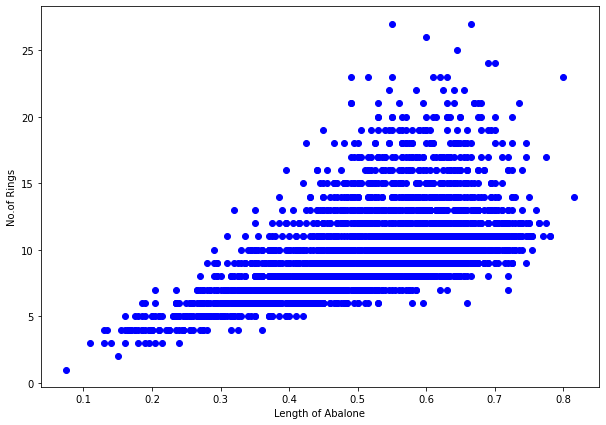

In [70]:
# Length v/s Rings

plt.figure(figsize = (10,7))
plt.scatter(Abalone_Data['Length'],Abalone_Data['Rings'], c = 'blue')
plt.xlabel('Length of Abalone')
plt.ylabel('No.of Rings')
plt.show()

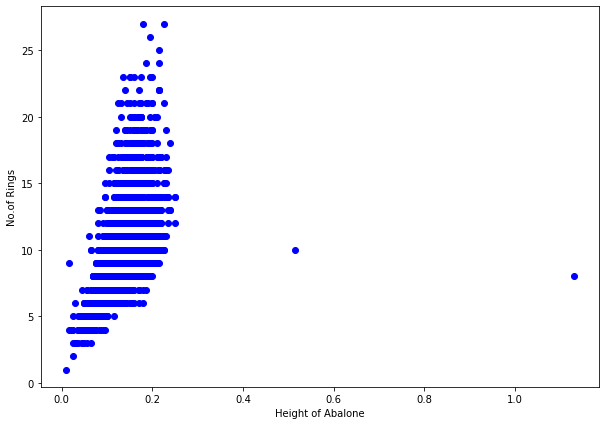

In [71]:
# Height v/s Rings

plt.figure(figsize = (10,7))
plt.scatter(Abalone_Data['Height'],Abalone_Data['Rings'], c = 'blue')
plt.xlabel('Height of Abalone')
plt.ylabel('No.of Rings')
plt.show()

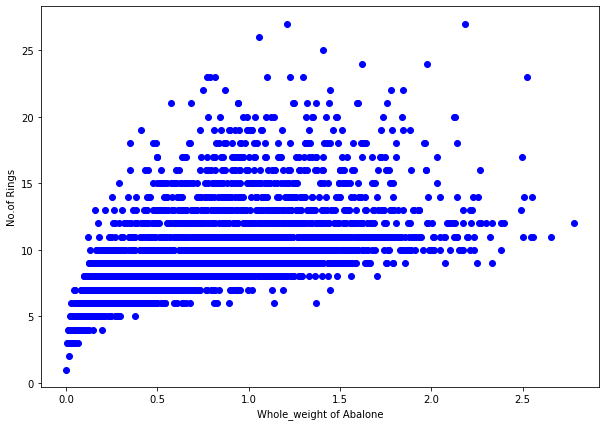

In [72]:
# Whole_weight v/s Rings

plt.figure(figsize = (10,7))
plt.scatter(Abalone_Data['Whole_weight'],Abalone_Data['Rings'], c = 'blue')
plt.xlabel('Whole_weight of Abalone')
plt.ylabel('No.of Rings')
plt.show()

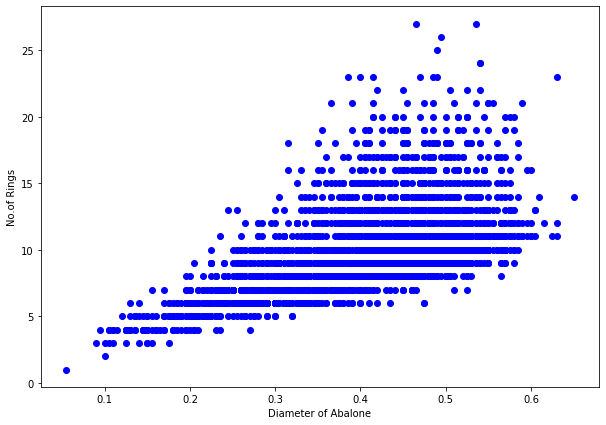

In [73]:
# Diameter v/s Rings

plt.figure(figsize = (10,7))
plt.scatter(Abalone_Data['Diameter'],Abalone_Data['Rings'], c = 'blue')
plt.xlabel('Diameter of Abalone')
plt.ylabel('No.of Rings')
plt.show()

In [74]:
Abalone_Data['Sex'].value_counts()

M    1232
F    1058
I    1049
Name: Sex, dtype: int64

Text(0, 0.5, 'Count')

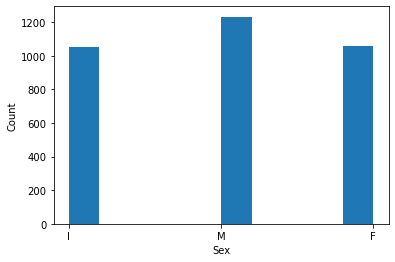

In [75]:
plt.hist(Abalone_Data['Sex'])
plt.xlabel("Sex")
plt.ylabel("Count")

### Visualising Pairwise correlation

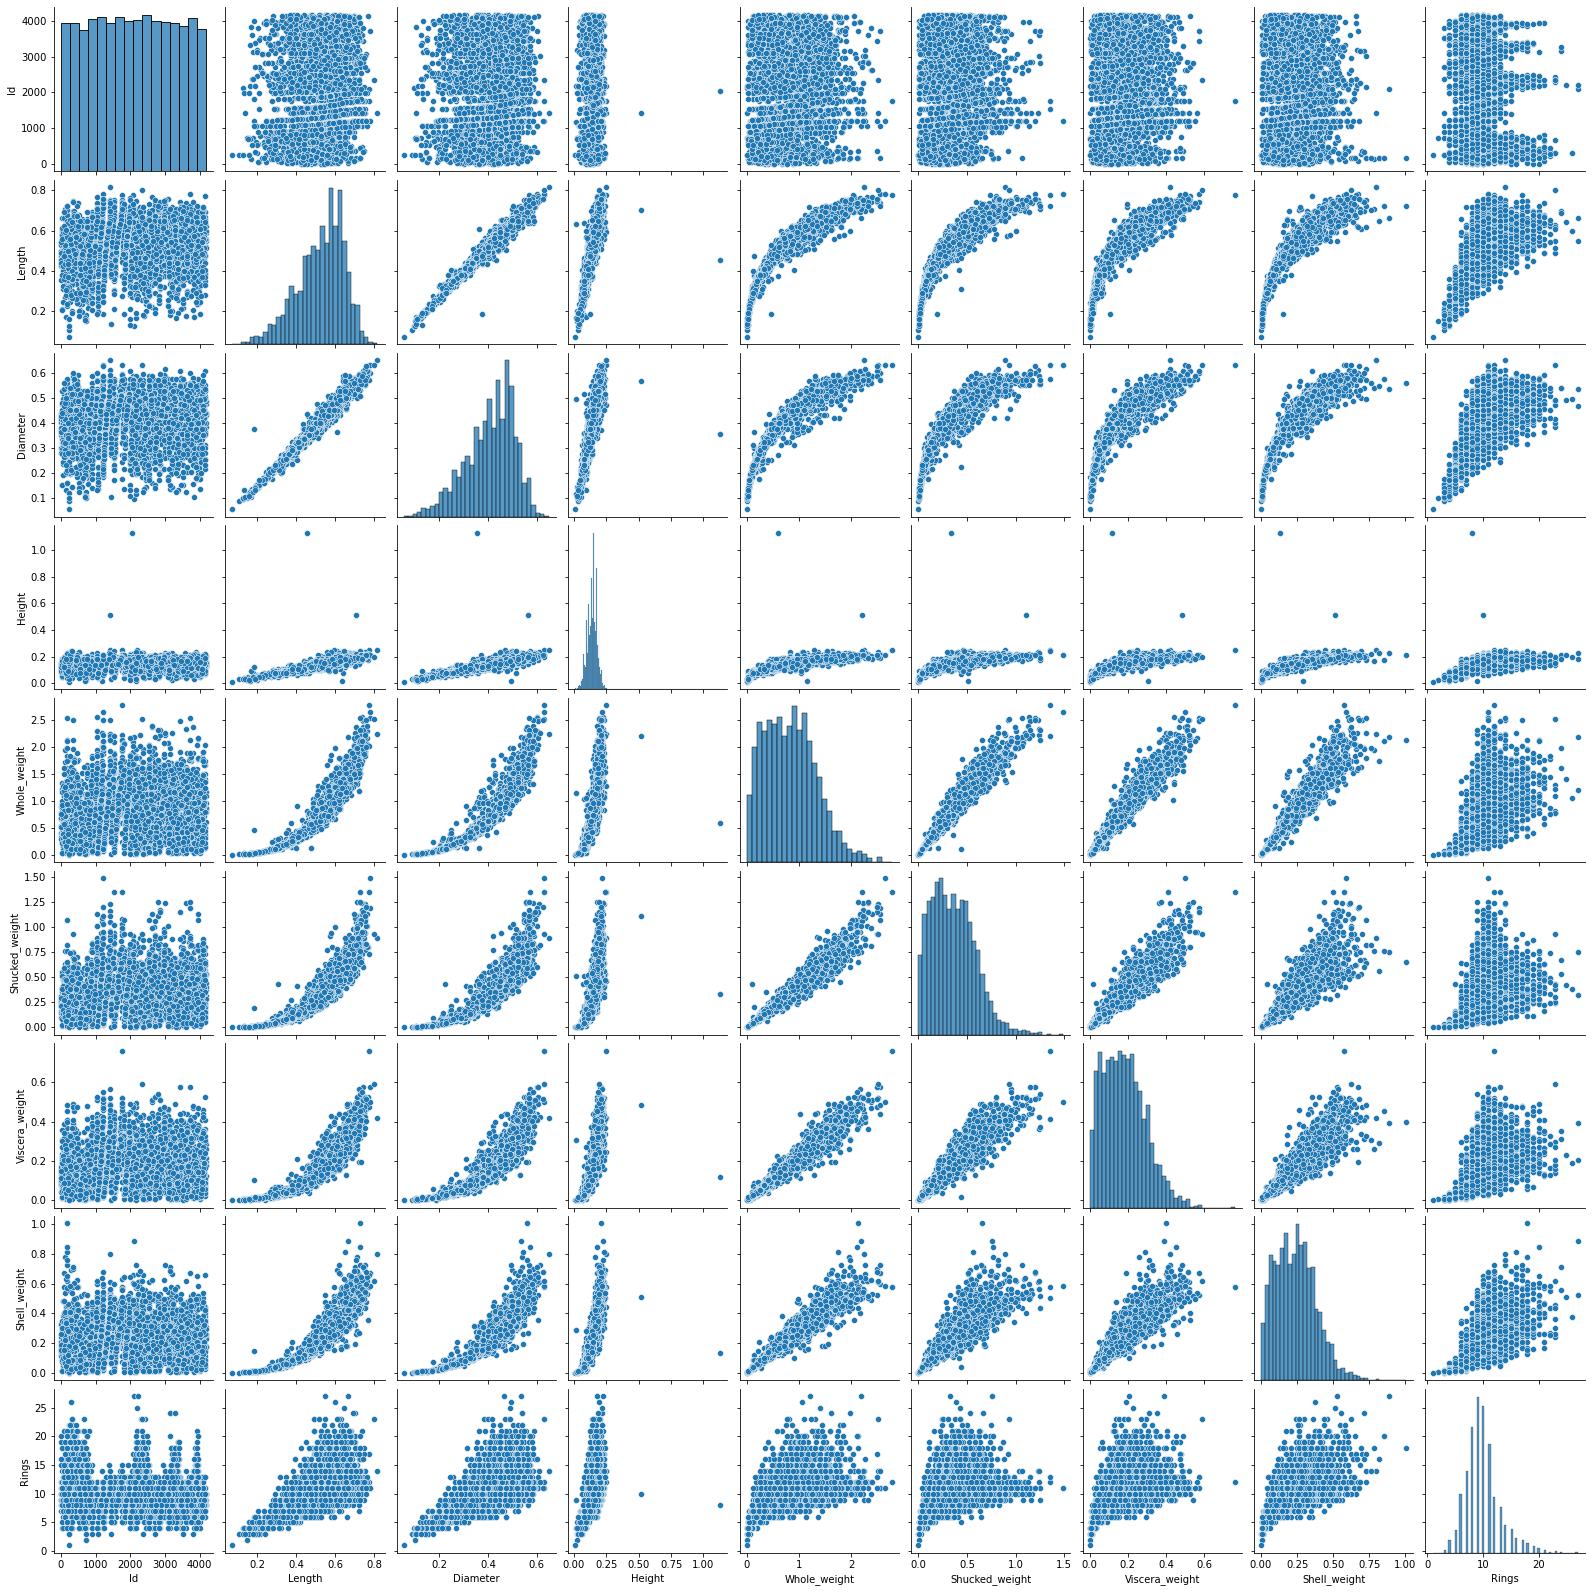

In [76]:
sns.pairplot(Abalone_Data)

### Calculating and plotting heatmap correlation

In [77]:
x = Abalone_Data.corr()
x

Id    Length  Diameter    Height  Whole_weight  \
Id              1.000000  0.087009  0.074181  0.040525      0.063600   
Length          0.087009  1.000000  0.986613  0.810102      0.925228   
Diameter        0.074181  0.986613  1.000000  0.815772      0.924713   
Height          0.040525  0.810102  0.815772  1.000000      0.803294   
Whole_weight    0.063600  0.925228  0.924713  0.803294      1.000000   
Shucked_weight  0.089833  0.898006  0.892664  0.762703      0.969481   
Viscera_weight  0.065333  0.901849  0.898034  0.781527      0.965892   
Shell_weight    0.035831  0.897557  0.904893  0.802012      0.953940   
Rings          -0.093446  0.551594  0.569299  0.533654      0.535041   

                Shucked_weight  Viscera_weight  Shell_weight     Rings  
Id                    0.089833        0.065333      0.035831 -0.093446  
Length                0.898006        0.901849      0.897557  0.551594  
Diameter              0.892664        0.898034      0.904893  0.569299  
Height                0.762703        0.781527      0.802012  0.533654  
Whole_weight          0.969481        0.965892      0.953940  0.535041  
Shucked_weight        1.000000        0.932433      0.880367  0.413984  
Viscera_weight        0.932433        1.000000      0.905376  0.496168  
Shell_weight          0.880367        0.905376      1.000000  0.625589  
Rings                 0.413984        0.496168      0.625589  1.000000

<AxesSubplot:>

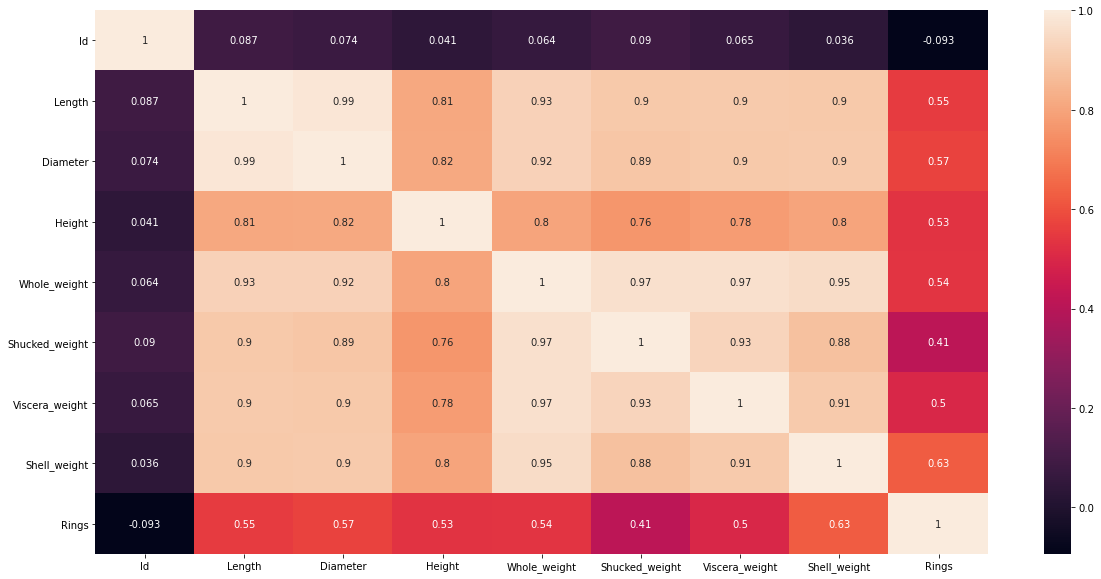

In [78]:
plt.figure(figsize=(20,10))
sns.heatmap(data = x, annot = True)

- Almost everything is strongly correlated with everything else, except count of Rings.

- All of the features associated with weight are pretty much perfectly correlated with each other.

- We can safely drop the **whole weight** probably it would be the sum of  **shucked weight, viscera weight, and shell weight**

- **Length and Diameter** are just about perfectly correlated.The circumference of an ellipse is proportional to its length. 


In [79]:
#Abalone_Data.head()

In [80]:
# Dropping column 'Id' as not required

Abalone_Data.drop('Id', axis = 1, inplace = True) 

In [81]:
# Dropping column Whole_weight as it is highly correlated to all other weights

Abalone_Data.drop(columns = ['Whole_weight'], axis = 1, inplace = True)

In [82]:
# Dropping column Diameter as it is highly correlated to Length

#Abalone_Data.drop(columns = ['Diameter'], axis = 1, inplace = True)

In [83]:
# Dropping column Height as it is highly correlated to Length and doesnt keep a very strong linear relation with Rings

#Abalone_Data.drop(columns = ['Height'], axis = 1, inplace = True)

In [84]:
# Dropping column Sex as categorical variable

#Abalone_Data.drop(columns = ['Sex'], axis = 1, inplace = True)

__One Hot Encoding__

In [85]:
# Converting categorical column 'Sex' values to numerical by one hot encoding

Abalone_Data= pd.get_dummies(Abalone_Data) 

In [86]:
Abalone_Data.head()

Length  Diameter  Height  Shucked_weight  Viscera_weight  Shell_weight  \
0   0.180     0.135   0.080          0.0145          0.0070        0.0100   
1   0.215     0.150   0.055          0.0150          0.0090        0.0125   
2   0.660     0.530   0.170          0.5905          0.2120        0.4530   
3   0.715     0.525   0.200          0.9500          0.4360        0.4305   
4   0.595     0.455   0.155          0.4160          0.2105        0.3650   

   Rings  Sex_F  Sex_I  Sex_M  
0      5      0      1      0  
1      3      0      1      0  
2     15      0      0      1  
3     10      0      0      1  
4     14      0      0      1

## 4.Preparing X and y using pandas

In [87]:
X = Abalone_Data[ ['Length','Diameter','Height','Shucked_weight','Viscera_weight','Shell_weight','Sex_F','Sex_I','Sex_M'] ]

In [88]:
y = Abalone_Data['Rings']

In [89]:
print("Shape of X :", X.shape)
print("Shape of y :", y.shape)

Shape of X : (3339, 9)
Shape of y : (3339,)


## 5.Splitting X and y into training and test datasets.

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [91]:
print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (2671, 9)
Shape of y_train : (2671,)
Shape of X_test : (668, 9)
Shape of y_test : (668,)


- __Standardization__. <br/>
Standardize features by removing the _mean_ and scaling to _unit standard deviation_.

In [92]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

In [93]:
#X_train[ [Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight'] ] = scaler.fit_transform(X_train[ [Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight'] ])

In [94]:
#X_test[ [Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight'] ] = scaler.transform(X_test[ [Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight'] ])

In [95]:
#print("Shape of X_train :", X_train.shape)
#print("Shape of y_train :", y_train.shape)
#print("Shape of X_test :", X_test.shape)
#print("Shape of y_test :", y_test.shape)

## 6. Linear regression

In [96]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

### Using the Model for Prediction

In [97]:
y_pred_test = regressor.predict(X_test)

In [98]:
y_pred_test

array([ 9.60427183, 15.41258337,  8.72364912, 17.39915872,  9.04339269,
        9.28009714,  9.00295969,  7.11755892, 14.86385384,  9.35352727,
       24.7420071 ,  9.66797018, 11.60841191, 10.03392693,  9.83742878,
        9.03759014, 13.68500842,  9.15707224,  7.15935855, 16.00776545,
       12.75681514,  7.20532484,  8.98176265, 10.45665856,  9.40502307,
       10.84211077,  8.73694079, 10.17636314, 11.93135841, 10.16088567,
        9.08413913,  9.1693852 , 10.31671734,  8.66743129, 12.11241961,
        7.95739205,  8.99969345, 11.03548498,  9.39183733, 11.77970179,
       12.88073533,  9.94724243,  9.0958643 ,  5.04132514, 13.18944988,
       13.04734033,  6.74808909, 13.71608865, 16.09704421,  8.04141032,
        8.11247032, 13.0977357 , 11.41726162,  6.92271446,  8.60763732,
       13.90852152,  7.27319556,  9.23267795,  4.40232649, 10.23282698,
       10.32948218, 10.41322977,  8.37797388,  8.10041606,  7.7496908 ,
        9.13432253,  9.9429429 , 10.71882072,  8.11544487,  8.72

In [99]:
y_test.head(15)

3171    10
575     15
1051     6
1238    17
3330    10
463      9
3322    10
1455     8
663     14
1965     8
2915    18
306     10
1514    10
3302    11
984      8
Name: Rings, dtype: int64

## 7. Model Evaluation using RMSE score metrics

- We need an evaluation metric in order to compare our predictions with the actual values.

In [100]:
from sklearn.metrics import  mean_squared_error

In [101]:
RMSE_Score = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [102]:
print('RMSE for test set is {}'.format(RMSE_Score))

RMSE for test set is 1.992841742779471


## 8. Using the model for predicting provided Test data

In [103]:
abalone_Test_Data = pd.read_csv('https://raw.githubusercontent.com/DevikaVijayan2021/Data-Science/main/Datasets/abalone_test.csv')
abalone_Test_Data.head()

Id Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0   668   M   0.550     0.425   0.155        0.9175          0.2775   
1  1580   I   0.500     0.400   0.120        0.6160          0.2610   
2  3784   M   0.620     0.480   0.155        1.2555          0.5270   
3   463   I   0.220     0.165   0.055        0.0545          0.0215   
4  2615   M   0.645     0.500   0.175        1.5105          0.6735   

   Viscera_weight  Shell_weight  
0          0.2430        0.3350  
1          0.1430        0.1935  
2          0.3740        0.3175  
3          0.0120        0.0200  
4          0.3755        0.3775

In [104]:
abalone_Test_Data.shape

(836, 9)

In [105]:
# Dropping the columns Diameter Id,shucked weight, viscera weight, and shell weight and keep only Whole_weight as multicollinearity found

abalone_Test_Data.drop(columns = ['Id','Whole_weight'], axis = 1, inplace = True) 

In [106]:
#Converting categorical column values to numerical

abalone_Test_Data= pd.get_dummies(abalone_Test_Data) 

In [107]:
abalone_Test_Data.head()

Length  Diameter  Height  Shucked_weight  Viscera_weight  Shell_weight  \
0   0.550     0.425   0.155          0.2775          0.2430        0.3350   
1   0.500     0.400   0.120          0.2610          0.1430        0.1935   
2   0.620     0.480   0.155          0.5270          0.3740        0.3175   
3   0.220     0.165   0.055          0.0215          0.0120        0.0200   
4   0.645     0.500   0.175          0.6735          0.3755        0.3775   

   Sex_F  Sex_I  Sex_M  
0      0      0      1  
1      0      1      0  
2      0      0      1  
3      0      1      0  
4      0      0      1

In [108]:
#abalone_Test_Data[ ['Length','Diameter',Height','Shucked_weight','Viscera_weight','Shell_weight'] ] = scaler.transform(abalone_Test_Data[ ['Length','Diameter',Height','Shucked_weight','Viscera_weight','Shell_weight'] ])

In [109]:
abalone_Test_Data.head()

Length  Diameter  Height  Shucked_weight  Viscera_weight  Shell_weight  \
0   0.550     0.425   0.155          0.2775          0.2430        0.3350   
1   0.500     0.400   0.120          0.2610          0.1430        0.1935   
2   0.620     0.480   0.155          0.5270          0.3740        0.3175   
3   0.220     0.165   0.055          0.0215          0.0120        0.0200   
4   0.645     0.500   0.175          0.6735          0.3755        0.3775   

   Sex_F  Sex_I  Sex_M  
0      0      0      1  
1      0      1      0  
2      0      0      1  
3      0      1      0  
4      0      0      1

In [110]:
abalone_Predicted_Test_Results = regressor.predict(abalone_Test_Data)

In [111]:
abalone_Predicted_Test_Results

array([13.5563355 ,  9.30332584, 10.90211904,  5.52675656, 10.74215925,
       12.37261796,  8.2335227 ,  9.79682089,  8.06044042, 12.50627199,
        8.15625521,  6.22671291,  8.51181338,  9.56920813,  5.92208685,
        9.60606048,  8.42850134, 13.29305171, 11.23418169,  7.78878353,
        7.58146964,  6.71023982,  8.95998327,  8.0114001 ,  9.45230556,
       11.56748618,  5.67772682, 12.54335598, 10.3659124 , 11.9117787 ,
        8.49671328,  4.66516099, 12.03063244, 13.34784579,  7.08897121,
        8.34611738,  8.41693795, 10.20316519,  8.20154396, 11.86583395,
       11.46992716,  9.89372938, 11.61996312, 11.31268888, 12.48262244,
        9.98222847,  9.3038202 , 13.45360792, 11.70983326,  7.93463408,
       12.18112491,  7.09066308,  9.6127086 , 13.58252864,  9.85009028,
        8.34938257,  6.95096695,  8.10206679,  7.2356091 ,  7.0636327 ,
       10.07389855,  9.24199745, 10.57988399,  7.54046082,  7.9525767 ,
       12.59354511, 12.48245733, 12.92815825,  8.59775784, 14.02

In [112]:
abalone_Predicted_Test_Results.shape

(836,)

### Calculatig Age

In [113]:
abalone_Test_Data = pd.read_csv('https://raw.githubusercontent.com/DevikaVijayan2021/Data-Science/main/Datasets/abalone_test.csv')
abalone_Test_Data.head()

Id Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0   668   M   0.550     0.425   0.155        0.9175          0.2775   
1  1580   I   0.500     0.400   0.120        0.6160          0.2610   
2  3784   M   0.620     0.480   0.155        1.2555          0.5270   
3   463   I   0.220     0.165   0.055        0.0545          0.0215   
4  2615   M   0.645     0.500   0.175        1.5105          0.6735   

   Viscera_weight  Shell_weight  
0          0.2430        0.3350  
1          0.1430        0.1935  
2          0.3740        0.3175  
3          0.0120        0.0200  
4          0.3755        0.3775

In [114]:
abalone_Predicted_Test_Results = abalone_Predicted_Test_Results.astype(int)

In [115]:
#From problem statement and feature discription, let's add the predicted results under 'Rings' column and compute the 'Age' by adding 1.5 to the Rings (Age = 1.5 + Rings)

abalone_Test_Data['Rings'] = pd.DataFrame(abalone_Predicted_Test_Results)
abalone_Test_Data['Age'] = abalone_Test_Data['Rings'] + 1.5

In [116]:
abalone_Test_Data.head()

Id Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0   668   M   0.550     0.425   0.155        0.9175          0.2775   
1  1580   I   0.500     0.400   0.120        0.6160          0.2610   
2  3784   M   0.620     0.480   0.155        1.2555          0.5270   
3   463   I   0.220     0.165   0.055        0.0545          0.0215   
4  2615   M   0.645     0.500   0.175        1.5105          0.6735   

   Viscera_weight  Shell_weight  Rings   Age  
0          0.2430        0.3350     13  14.5  
1          0.1430        0.1935      9  10.5  
2          0.3740        0.3175     10  11.5  
3          0.0120        0.0200      5   6.5  
4          0.3755        0.3775     10  11.5

##### Final Submission File

In [117]:
predictions = abalone_Test_Data[['Id','Rings']]

In [119]:
pd.DataFrame(predictions).to_csv(r'C:\Users\muser\Abalone Age Prediction\Predictions_submission.csv',index = False, header = False)